In [82]:
from collections import defaultdict
import logging
logging.basicConfig(level=logging.DEBUG, format="%(asctime)s: (%(lineno)s) %(levelname)s %(message)s")
import operator
import random
import re

%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 6)

import networkx as nx

Populating the interactive namespace from numpy and matplotlib


/home/makrai/tool/python/venv3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['size', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [52]:
def read_pos_dict():
    logging.info('Reading POS data...')
    pos_d = defaultdict(lambda: 'unk')
    with open('/mnt/permanent/Language/Hungarian/Crawl/Web2/ana/all_morphtable', encoding='latin2') as infile:
        for i, line in enumerate(infile):
                vals = line.strip().split()
                if len(vals) != 2:
                    continue
                word, w_per_ana = vals
                ana = re.findall('[A-Z][A-Z-]+', w_per_ana)[0]
                pos_d[word] = ana
    logging.debug(pos_d.values())
    logging.info('Finished.')
    return pos_d

pos_d = read_pos_dict()

2018-01-16 15:07:52,580: (2) INFO Reading POS data...
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
2018-01-16 15:08:36,294: (13) INFO Finished.


In [53]:
def get_pos_colors():
    #['b', 'g', 'r', 'c', 'm', 'y', 'k']
    pos_color = defaultdict(lambda: 'k')
    pos_color.update({
        'NOUN': 'b',
        'VERB': 'g',
        'ADJ': 'c',
        'ADV': 'm',
        'CONJ': 'r'})
    pos_color['NUM'] = pos_color['ADJ']
    return pos_color

pos_color = get_pos_colors()

In [169]:
def sort_by_value(dict_):
    #logging.debug(dict_)
    return sorted(dict_.items(), key=operator.itemgetter(1), reverse=True)

def plot_measure(size, directed=True, samp_len=None, annotate_degree=.01):
    logging.info('Reading graph...')
    G = nx.read_gpickle(
        '/mnt/permanent/home/makrai/project/TextBetweenness/mnsz_{}-sent.gpickle'.format(size))
    logging.info('{} nodes and {} edges read.'.format(G.number_of_nodes(), G.number_of_edges()))
    logging.info('Computing directed degree...')
    degree_d = nx.degree_centrality(G)
    if not directed:
        logging.info('Computing undirected graph...')
        G = nx.to_undirected(G)
    logging.info('Computing measure...')
    mea = nx.centrality.closeness_centrality(G)
    if samp_len and len(degree_d) > samp_len:
        logging.info('Sampling...')
        degree_d = dict(random.sample(degree_d.items(), samp_len))
    logging.info('Sorting...')
    words, degree_l = zip(*sort_by_value(degree_d))
    logging.info('Plotting...')
    plt.xscale('log')
    #plt.yscale('log')
    plt.scatter(
        [degree_d[w] for w in words],
        [mea[w] for w in words],
        c=[pos_color[pos_d[w]] for w in words],
        s=5)
    for w in words:
        if degree_d[w] > annotate_degree:
            plt.annotate(w, (degree_d[w], mea[w]), color=pos_color[pos_d[w]])

2018-01-16 15:43:10,511: (6) INFO Reading graph...
2018-01-16 15:43:10,557: (9) INFO 6828 nodes and 12952 edges read.
2018-01-16 15:43:10,559: (10) INFO Computing directed degree...
2018-01-16 15:43:10,573: (15) INFO Computing measure...
2018-01-16 15:48:16,046: (20) INFO Sorting...
2018-01-16 15:48:16,055: (22) INFO Plotting...


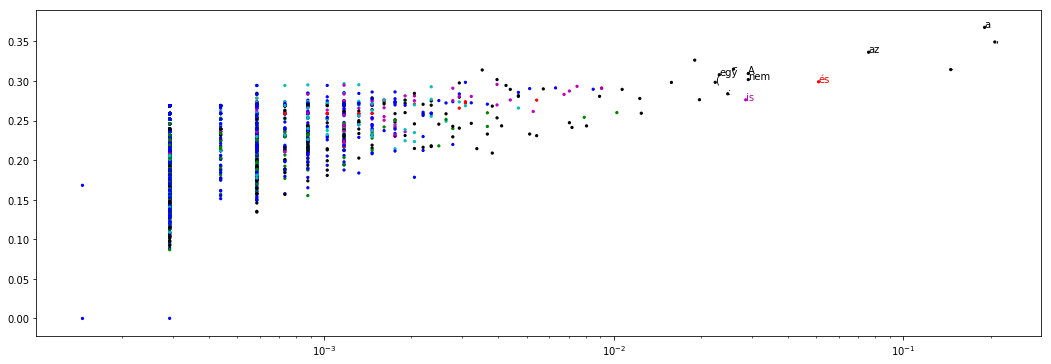

In [173]:
size = '1k'
plot_measure(size, annotate_degree=.02)

2018-01-16 15:42:45,251: (6) INFO Reading graph...
2018-01-16 15:42:45,255: (9) INFO 125 nodes and 165 edges read.
2018-01-16 15:42:45,256: (10) INFO Computing directed degree...
2018-01-16 15:42:45,257: (13) INFO Computing undirected graph...
2018-01-16 15:42:45,258: (15) INFO Computing measure...
2018-01-16 15:42:45,452: (20) INFO Sorting...
2018-01-16 15:42:45,455: (22) INFO Plotting...


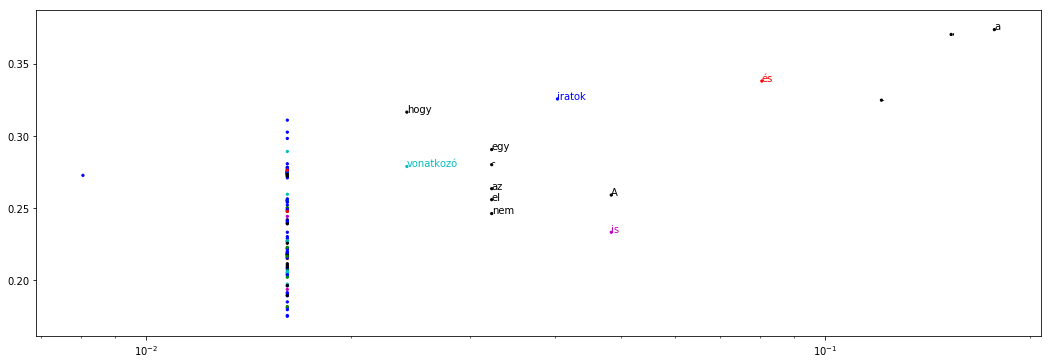

In [171]:
plot_measure(size, directed=False, annotate_degree=.02)